<a href="https://colab.research.google.com/github/vieirapp/Data-Science/blob/master/Projeto_Artigo_Previs%C3%A3o_Reabastecimento_ATMs_Perceptron_MultLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Artigo - Previsão Reabastecimento ATMs - Perceptron MultLayer**

Importando as Bibliotecas Iniciais

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Carregando o DataSet e Criando o Dataframe

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/Datasets/'  

In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/AggregatedData.csv')

##Análise Exploratória Inicial

In [56]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


In [57]:
df.corr()

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
No Of Withdrawals,1.000000,0.828651,0.718444,0.916664,0.767584,0.719508
No Of XYZ Card Withdrawals,0.828651,1.000000,0.205975,0.843602,0.936311,0.284056
No Of Other Card Withdrawals,0.718444,0.205975,1.000000,0.554181,0.178363,0.904834
Total amount Withdrawn,0.916664,0.843602,0.554181,1.000000,0.897033,0.686792
Amount withdrawn XYZ Card,0.767584,0.936311,0.178363,0.897033,1.000000,0.294833
Amount withdrawn Other Card,0.719508,0.284056,0.904834,0.686792,0.294833,1.000000


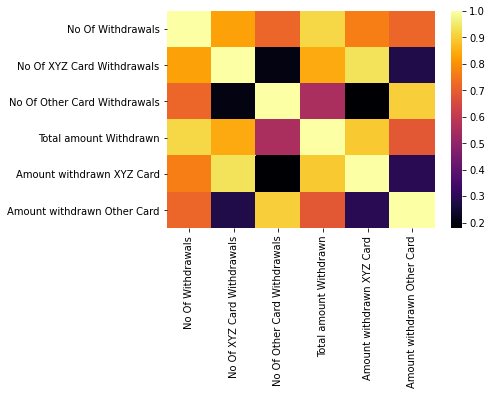

In [58]:
sns.heatmap(df.corr(), cmap='inferno') #gerando heatmap a partir da correlação

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
ATM Name                        11589 non-null object
Transaction Date                11589 non-null object
No Of Withdrawals               11589 non-null int64
No Of XYZ Card Withdrawals      11589 non-null int64
No Of Other Card Withdrawals    11589 non-null int64
Total amount Withdrawn          11589 non-null int64
Amount withdrawn XYZ Card       11589 non-null int64
Amount withdrawn Other Card     11589 non-null int64
Weekday                         11589 non-null object
Festival Religion               11589 non-null object
Working Day                     11589 non-null object
Holiday Sequence                11589 non-null object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [60]:
atm = df.groupby('ATM Name') #agrupoar dados por ATM
atm.sum()   #sumarizar dados agrupoados

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
ATM Name,,,,,,
Airport ATM,204709,152231,52478,999511100,827094200,172416900
Big Street ATM,207062,68770,138292,726419500,323523900,402895600
Christ College ATM,291207,118955,172252,1311309000,639314100,671994900
KK Nagar ATM,401858,288624,113234,1854299300,1389992600,464306700
Mount Road ATM,324564,154462,170102,1161463900,697295100,464168800


In [61]:
atm.size() #quantidade de registros do grupo

ATM Name
Airport ATM           2253
Big Street ATM        2354
Christ College ATM    2355
KK Nagar ATM          2371
Mount Road ATM        2256
dtype: int64

In [62]:
atm.sum()['No Of Withdrawals']/atm.size() #proporção entre o Número de Saques por registros de movimentações.

ATM Name
Airport ATM            90.860630
Big Street ATM         87.961767
Christ College ATM    123.654777
KK Nagar ATM          169.488823
Mount Road ATM        143.867021
dtype: float64

In [63]:
df.describe()['No Of Withdrawals']#Dados Estatísticos da categoria Número de Saques

count    11589.000000
mean       123.341099
std         67.315288
min          1.000000
25%         79.000000
50%        115.000000
75%        158.000000
max        491.000000
Name: No Of Withdrawals, dtype: float64

In [64]:
df.describe()['Total amount Withdrawn'] #Dados Estatísticos da categoria Total de Valores Sacados

count    1.158900e+04
mean     5.223059e+05
std      3.248167e+05
min      1.000000e+02
25%      3.057000e+05
50%      4.700000e+05
75%      6.716000e+05
max      2.549800e+06
Name: Total amount Withdrawn, dtype: float64

**OBS:** Nas duas sessões acima que descrevem dados estatísticos de: número de saques (No Of Withdrawals) e volume de valores sacados (Total amount Withdrawn), percebe-se um equilíbrio se compararmos ambos os Quartís (25%/50%/75%). 

In [65]:
wkd = df.groupby('Weekday') #agrupoar dados por Dia da Semana
wkd.sum()   #sumarizar dados agrupados

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
Weekday,,,,,,
Friday,167463,92382,75081,713503600,456597600,256906000
Monday,181986,101032,80954,796975400,511211100,285764300
Saturday,224705,122441,102264,973023900,621518100,351505800
Sunday,311304,162960,148344,1183158800,734810300,448348500
Thursday,174770,96833,77937,768061500,495101100,272960400
Tuesday,185715,104697,81018,801058400,523129400,277929000
Wednesday,183457,102697,80760,817221200,534852300,282368900


In [66]:
wkd.sum()['No Of Withdrawals']/wkd.size() #proporção entre o Número de Saques por Dia da Semana

Weekday
Friday       118.599858
Monday       124.818930
Saturday     136.267435
Sunday       115.898734
Thursday     123.077465
Tuesday      123.645140
Wednesday    125.483584
dtype: float64

In [67]:
wkd.sum()['Total amount Withdrawn']/wkd.size() #proporção entre o Total de Valores Sacados por Dia da Semana

Weekday
Friday       505314.164306
Monday       546622.359396
Saturday     590069.072165
Sunday       440490.990320
Thursday     540888.380282
Tuesday      533327.829561
Wednesday    558974.829001
dtype: float64

##### **OBS:** Nas duas sessões acima é interessante observar que tanto o **total de número de saques** quanto o **total em valores sacados**, o maior volume de ambos acontece aos Sábados, em 2º posição as Quartas-Feiras. Segundas, Terças e Quintas se mantém equilibradas e às Sextas existe uma queda considerável, Domingo é o dia que encontra-se os menores valores.

In [68]:
dut = df.groupby('Working Day') #agrupoar dados por Dia Útil
dut.sum()   #sumarizar dados agrupados

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
Working Day,,,,,,
H,606092,322863,283229,2436365100,1531865500,904499600
W,823308,460179,363129,3616637700,2345354400,1271283300


**OBS:** Acima podemos notar que o número de saques (No Of Withdrawals) em relação ao volume de valores sacados (Total amount Withdrawn) são bem maiores em **dias úteis (w)** que em **feriados (h)**. E se notarmos no gráfico (logo abaixo) houve mais dias úteis que feriados (que justifica o motivo).

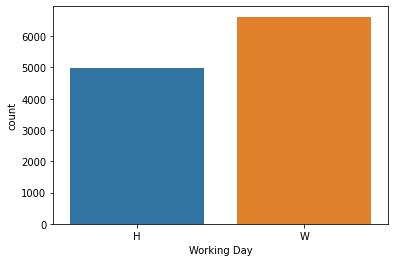

In [69]:
sns.countplot(df['Working Day']) #contagem da categoria "dias úteis"

##Pré-Processamento dos Dados

In [0]:
dfp = df.copy() #copiando o dataset original para um exclusivo para o pré-processamento e treino da rede

In [71]:
dfp.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'Festival Religion',
       'Working Day', 'Holiday Sequence'],
      dtype='object')

In [0]:
drop_list = ['No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals','Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card']

In [0]:
dfp.drop(drop_list, axis = 1, inplace = True) #removendo as colunas da lista acima e criando um novo Dataset

In [74]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 8 columns):
ATM Name                  11589 non-null object
Transaction Date          11589 non-null object
No Of Withdrawals         11589 non-null int64
Total amount Withdrawn    11589 non-null int64
Weekday                   11589 non-null object
Festival Religion         11589 non-null object
Working Day               11589 non-null object
Holiday Sequence          11589 non-null object
dtypes: int64(2), object(6)
memory usage: 724.4+ KB


In [75]:
dfp.dtypes

ATM Name                  object
Transaction Date          object
No Of Withdrawals          int64
Total amount Withdrawn     int64
Weekday                   object
Festival Religion         object
Working Day               object
Holiday Sequence          object
dtype: object

#####**Convertendo** a categoria Transaction Date de Objeto para DateTime

In [0]:
dfp['Transaction Date'] =  pd.to_datetime(df['Transaction Date'], infer_datetime_format=True)

In [77]:
dfp.dtypes

ATM Name                          object
Transaction Date          datetime64[ns]
No Of Withdrawals                  int64
Total amount Withdrawn             int64
Weekday                           object
Festival Religion                 object
Working Day                       object
Holiday Sequence                  object
dtype: object

#### Separando Dia, Mês e Ano em colunas distintas e removendo a coluna 'Transaction Date'

In [0]:
dfp['Ano'] = dfp['Transaction Date'].dt.year
dfp['Mês'] = dfp['Transaction Date'].dt.month
dfp['Dia'] = dfp['Transaction Date'].dt.day

In [0]:
dfp.drop(['Transaction Date'], axis=1, inplace=True)

In [80]:
dfp.head()

,ATM Name,No Of Withdrawals,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,Ano,Mês,Dia
0,Big Street ATM,50,123800,Saturday,H,H,WHH,2011,1,1
1,Mount Road ATM,253,767900,Saturday,C,H,WHH,2011,1,1
2,Airport ATM,98,503400,Saturday,C,H,WHH,2011,1,1
3,KK Nagar ATM,265,945300,Saturday,C,H,WHH,2011,1,1
4,Christ College ATM,74,287700,Saturday,C,H,WHH,2011,1,1


#### Transformar dados categóricos em variáveis dummy para melhor leitura do Modelo de Predição

In [81]:
dfp = pd.get_dummies(dfp, columns=['ATM Name', 'Weekday', 'Working Day', 'Festival Religion', 'Holiday Sequence'])
dfp.head()

,No Of Withdrawals,Total amount Withdrawn,Ano,Mês,Dia,ATM Name_Airport ATM,ATM Name_Big Street ATM,ATM Name_Christ College ATM,ATM Name_KK Nagar ATM,ATM Name_Mount Road ATM,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Working Day_H,Working Day_W,Festival Religion_C,Festival Religion_H,Festival Religion_M,Festival Religion_N,Festival Religion_NH,Holiday Sequence_HHH,Holiday Sequence_HHW,Holiday Sequence_HWH,Holiday Sequence_HWW,Holiday Sequence_WHH,Holiday Sequence_WHW,Holiday Sequence_WWH,Holiday Sequence_WWW
0,50,123800,2011,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,253,767900,2011,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,98,503400,2011,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,265,945300,2011,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,74,287700,2011,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
dfp.shape

(11589, 32)

In [0]:
#Download do Dataset em CSV - linhas comentadas pois é para uso paralelo ao notebook
#from google.colab import files
#dfp.to_csv('orange.csv')
#files.download('orange.csv')

####Seperar os dados de Treino e Teste para o modelo de Predição

In [0]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(dfp.drop('Total amount Withdrawn', axis=1),
                                                    dfp['Total amount Withdrawn'], test_size=0.20,
                                                    random_state=42)

####Setup da Rede Neural - MLPClassifier

In [85]:
from sklearn.neural_network import MLPRegressor
redeNeural = MLPRegressor(verbose=True, max_iter=1000, tol=0.0001, activation='tanh', solver='sgd',
                          learning_rate_init=0.001, early_stopping=True, hidden_layer_sizes=(32,150))
print(redeNeural) #exibir os todos os parâmetros

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(32, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)


#### Encaixa entradas e saídas e TREINA rede / Faz a predição baseado na entrada informada como parâmetro

#### Treinar o Modelo

In [86]:
redeNeural.fit(x_treino, y_treino)

Iteration 1, loss = 62879102577.57102966
Validation score: -0.000088
Iteration 2, loss = 53072056298.05709839
Validation score: -0.000004
Iteration 3, loss = 53110917293.74044800
Validation score: -0.000256
Iteration 4, loss = 53129274079.93082428
Validation score: -0.000001
Iteration 5, loss = 53165243629.48199463
Validation score: -0.000484
Iteration 6, loss = 53114625212.45293427
Validation score: -0.003201
Iteration 7, loss = 53103395326.22705841
Validation score: -0.001156
Iteration 8, loss = 53109489041.12953186
Validation score: -0.001647
Iteration 9, loss = 53093144823.00202179
Validation score: -0.000717
Iteration 10, loss = 53154741351.24905396
Validation score: -0.000204
Iteration 11, loss = 53130970305.63462067
Validation score: -0.000117
Iteration 12, loss = 53175627790.99256897
Validation score: -0.000013
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(32, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

#### Avaliação do Modelo

In [0]:
predito = redeNeural.predict(x_teste)

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Média Absoluta do Erro
print( '\nResultado da Media Absoluta do Erro = {:.2f}'.format(mean_absolute_error(y_teste, redeNeural.predict(x_teste))))

# Raíz Quadrada do Erro Médio
print( '\nResultado do Raiz Quadrada do Erro Médio = {:.2f}'.format(mean_squared_error(y_teste, redeNeural.predict(x_teste))))


Resultado da Media Absoluta do Erro = 240172.31

Resultado do Raiz Quadrada do Erro Médio = 101542523950.52


###Criar um DataFrame para comparar Predito do Real - TODOS ATM

In [0]:
# Loop de auxilio para criação de outro dataframe
lista = []
for i in range(2318):
    lista.append(i)

In [111]:
compara = [y_teste,predito]
compara = np.array(compara)
compara.shape

(2, 2318)

In [115]:
compara = compara.reshape(2318,2)
df_pred = pd.DataFrame(compara,index=lista,columns=['real','pred'])
df_pred.head()

,real,pred
0,663100.0,148300.0
1,412900.0,325800.0
2,376700.0,495300.0
3,381000.0,940600.0
4,361800.0,209400.0


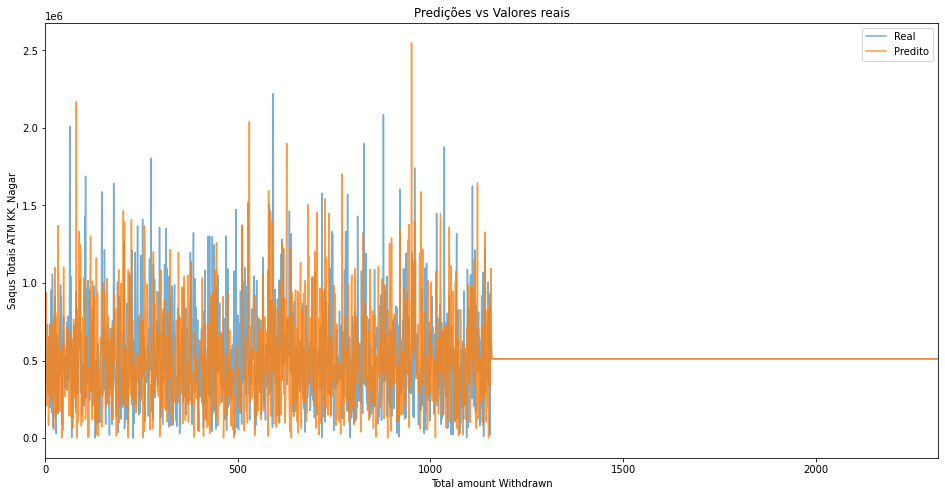

In [116]:
# Plot dos valores reais contra predições
plt.figure()
df_pred_2['real'].plot(label='Real',alpha=0.6,figsize=(16,8))
df_pred_2['pred'].plot(label='Predito',alpha=0.8)
plt.title('Predições vs Valores reais')
plt.ylabel('Saqus Totais ATM KK_Nagar')
plt.xlabel('Total amount Withdrawn')
plt.legend();

# Modelo considerando apenas um único ATM (KK Nagar ATM)

### Criando um Dataset apenas com 1 Caixa Eletrônico e aplicando o Modelo

In [0]:
atmKKNagar = dfp

In [90]:
atmKKNagar.columns

Index(['No Of Withdrawals', 'Total amount Withdrawn', 'Ano', 'Mês', 'Dia',
       'ATM Name_Airport ATM', 'ATM Name_Big Street ATM',
       'ATM Name_Christ College ATM', 'ATM Name_KK Nagar ATM',
       'ATM Name_Mount Road ATM', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday', 'Working Day_H',
       'Working Day_W', 'Festival Religion_C', 'Festival Religion_H',
       'Festival Religion_M', 'Festival Religion_N', 'Festival Religion_NH',
       'Holiday Sequence_HHH', 'Holiday Sequence_HHW', 'Holiday Sequence_HWH',
       'Holiday Sequence_HWW', 'Holiday Sequence_WHH', 'Holiday Sequence_WHW',
       'Holiday Sequence_WWH', 'Holiday Sequence_WWW'],
      dtype='object')

In [0]:
drop_list = ['ATM Name_Airport ATM', 'ATM Name_Big Street ATM','ATM Name_Christ College ATM',
       'ATM Name_Mount Road ATM']

In [0]:
atmKKNagar.drop(drop_list, axis = 1, inplace = True) #removendo as colunas da lista acima e criando um novo Dataset

In [93]:
atmKKNagar.shape

(11589, 28)

In [0]:
x_treino, x_teste, y_treino, y_teste = train_test_split(atmKKNagar.drop('Total amount Withdrawn', axis=1),
                                                    dfp['Total amount Withdrawn'], test_size=0.20,
                                                    random_state=42)

In [95]:
redeNeural_2 = MLPRegressor(verbose=True, max_iter=1000, tol=0.0001, activation='tanh', solver='sgd',
                          learning_rate_init=0.001, early_stopping=True, hidden_layer_sizes=(28,200))
print(redeNeural_2) #exibir os todos os parâmetros

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(28, 200), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)


In [96]:
redeNeural_2.fit(x_treino, y_treino)

Iteration 1, loss = 64033624615.64243317
Validation score: -0.001024
Iteration 2, loss = 53755495041.35793304
Validation score: -0.000101
Iteration 3, loss = 53813335381.70586395
Validation score: -0.000034
Iteration 4, loss = 53756658113.22497559
Validation score: -0.001583
Iteration 5, loss = 53696802804.46099091
Validation score: -0.000620
Iteration 6, loss = 53719946207.31505585
Validation score: -0.011372
Iteration 7, loss = 53590504209.68605804
Validation score: -0.001971
Iteration 8, loss = 53661111417.42047882
Validation score: -0.007969
Iteration 9, loss = 53637723153.53678894
Validation score: -0.002516
Iteration 10, loss = 53773595861.33573151
Validation score: -0.000631
Iteration 11, loss = 53671395335.15313721
Validation score: -0.001703
Iteration 12, loss = 53669836078.35328674
Validation score: -0.012000
Iteration 13, loss = 53737625485.43890381
Validation score: -0.001506
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(28, 200), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [97]:
predito_2 = redeNeural_2.predict(x_teste)

# Média Absoluta do Erro
print( '\nResultado da Media Absoluta do Erro = {:.2f}'.format(mean_absolute_error(y_teste, redeNeural_2.predict(x_teste))))

# Raíz Quadrada do Erro Médio
print( '\nResultado do Raiz Quadrada do Erro Médio = {:.2f}'.format(mean_squared_error(y_teste, redeNeural_2.predict(x_teste))))


Resultado da Media Absoluta do Erro = 238503.81

Resultado do Raiz Quadrada do Erro Médio = 101543360892.76


###Criar um DataFrame para comparar Predito do Real - KK Nagar ATM

In [0]:
# Loop de auxilio para criação de outro dataframe
lista = []
for i in range(2318):
    lista.append(i)

In [102]:
compara_2 = [y_teste,predito_2]
compara_2 = np.array(compara_2)
compara_2.shape

(2, 2318)

In [112]:
compara_2 = compara_2.reshape(2318,2)
df_pred_2 = pd.DataFrame(compara_2,index=lista,columns=['real','pred'])
df_pred_2.head()

,real,pred
0,663100.0,148300.0
1,412900.0,325800.0
2,376700.0,495300.0
3,381000.0,940600.0
4,361800.0,209400.0


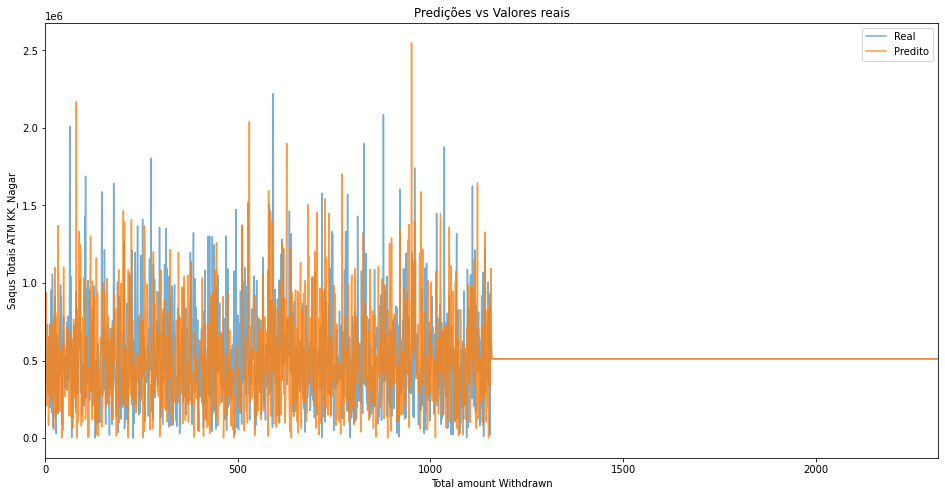

In [113]:
# Plot dos valores reais contra predições
plt.figure()
df_pred_2['real'].plot(label='Real',alpha=0.6,figsize=(16,8))
df_pred_2['pred'].plot(label='Predito',alpha=0.8)
plt.title('Predições vs Valores reais')
plt.ylabel('Saqus Totais ATM KK_Nagar')
plt.xlabel('Total amount Withdrawn')
plt.legend();